In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as seaborn
from sklearn.model_selection import train_test_split
from sklearn.impute import IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from imblearn.over_sampling import SMOTE


Loading Dataset

In [6]:
df1 = pd.read_csv('https://raw.githubusercontent.com/AnruthaKamal/LoanPrediction/main/train_ctrUa4K.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/AnruthaKamal/LoanPrediction/main/test_lAUu6dG.csv')

##Preprocessing 

In [7]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
df1.shape

(614, 13)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
df1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [11]:
df1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
df2.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [13]:
df1['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [14]:
data = pd.concat([df1,df2])

In [15]:
data.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [16]:
data.drop('Loan_ID',axis=1,inplace=True)

Handling Missing Values ( Categorical )

In [17]:
data['Gender'] = data['Gender'].fillna(data['Gender'].dropna().mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].dropna().mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].dropna().mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].dropna().mode()[0])
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].dropna().mode()[0])

In [18]:
data.isnull().sum()

Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

Handling Missing Values ( Numerical )

In [19]:
data1 = data.loc[:,['LoanAmount','Loan_Amount_Term']]
imputer = IterativeImputer(RandomForestRegressor(),max_iter=10,random_state=1)
data1 = pd.DataFrame(imputer.fit_transform(data1),columns=data1.columns)

/usr/local/lib/python3.8/dist-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [20]:
data['LoanAmount'] = data1['LoanAmount']
data['Loan_Amount_Term'] = data1['Loan_Amount_Term']

In [21]:
data.isnull().sum()

Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

In [22]:
data['Gender'] = data['Gender'].map({'Male':0,'Female':1}).astype(int)
data['Married'] = data['Married'].map({'No':0,'Yes':1}).astype(int)
data['Education'] = data['Education'].map({'Not Graduate':0,'Graduate':1}).astype(int)
data['Self_Employed'] = data['Self_Employed'].map({'No':0,'Yes':1}).astype(int)
data['Credit_History'] = data['Credit_History'].astype(int)

In [23]:
data['Property_Area'] = data['Property_Area'].map({'Urban':0,'Rural':1,'Semiurban':2}).astype(int)
data['Dependents'] = data['Dependents'].map({'0':0,'1':1,'2':2,'3+':3}).astype(int) 

In [24]:
data_train = data.iloc[:614]
data_test = data.iloc[614:]

##EDA

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

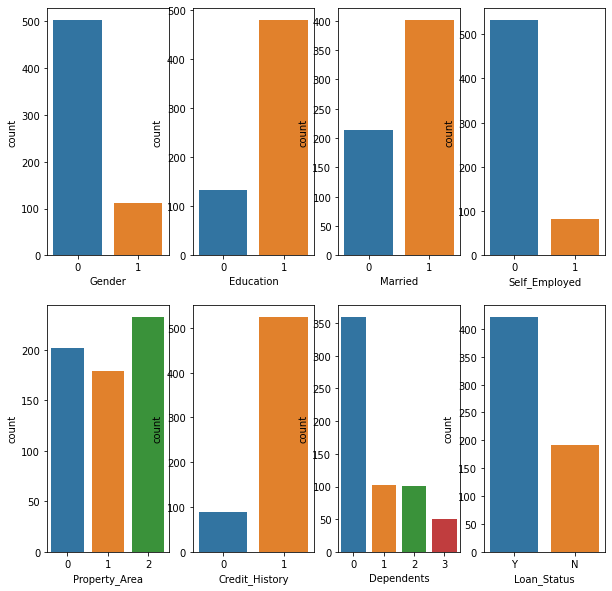

In [33]:
fig , ax = plt.subplots(2,4,figsize=(10,10))
sns.countplot('Gender',data=data_train,ax=ax[0][0])
sns.countplot('Education',data=data_train,ax=ax[0][1])
sns.countplot('Married',data=data_train,ax=ax[0][2])
sns.countplot('Self_Employed',data=data_train,ax=ax[0][3])
sns.countplot('Property_Area',data=data_train,ax=ax[1][0])
sns.countplot('Credit_History',data=data_train,ax=ax[1][1])
sns.countplot('Dependents',data=data_train,ax=ax[1][2])
sns.countplot('Loan_Status',data=data_train,ax=ax[1][3])



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


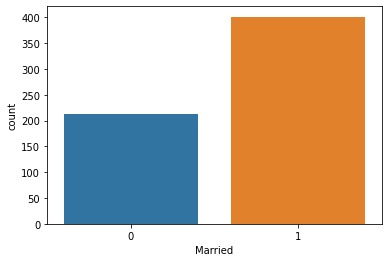

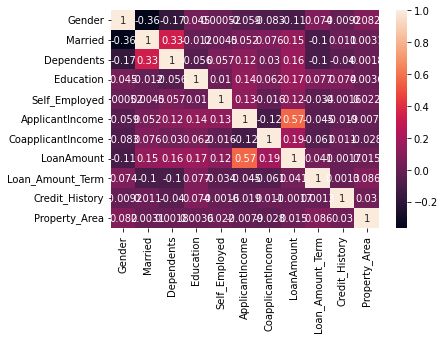

In [34]:
sns.heatmap(data_train.corr(),annot=True)

##Feature Engineering 

In [49]:
data['LoanAmount'] = data['LoanAmount'].apply(lambda x : Decimal(x))
data['CoapplicantIncome'] = data['CoapplicantIncome'].apply(lambda x : Decimal(x))
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].apply(lambda x : Decimal(x))


In [62]:
data['LoanAmount'] = data['LoanAmount'].astype(int)
data['CoapplicantIncome'] = data['CoapplicantIncome'].astype(int)
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].astype(int)

In [72]:
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']
r = (8/12)/100
data['EMI'] = data.apply(lambda x : (x['LoanAmount']*1000*r*((1+r)**x['Loan_Amount_Term']))/((1+r)**(x['Loan_Amount_Term'])-1),axis=1).astype(int)

In [73]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,EMI
0,0,0,0,1,0,5849,0,143,360,1,0,Y,5849,1049
1,0,1,1,1,0,4583,1508,128,360,1,1,N,6091,939
2,0,1,0,1,1,3000,0,66,360,1,0,Y,3000,484
3,0,1,0,0,0,2583,2358,120,360,1,0,Y,4941,880
4,0,0,0,1,0,6000,0,141,360,1,0,Y,6000,1034


In [75]:
data['Total_Income_Emi_diff'] = data['Total_Income']-data['EMI']
data['EMI_loan_amt'] = data['EMI']/data['LoanAmount']
data['EMI_total_income'] = data['EMI']/data['Total_Income']


##MODEL FITTING 

In [76]:
data_train = data.iloc[:614]
data_test = data.iloc[614:]

In [77]:
X = data_train.drop(columns = ['Loan_Status'])
Y = data_train['Loan_Status']

In [78]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)


In [110]:
Y_train.value_counts()

Y    338
N    153
Name: Loan_Status, dtype: int64

upsampling

In [114]:
print("Before UpSampling, counts of label '1': {}".format(sum(Y_train=='Y')))
print("Before UpSampling, counts of label '0': {} \n".format(sum(Y_train=='N')))
sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train.ravel())
print("After UpSampling, counts of label '1': {}".format(sum(Y_train_res=='Y')))
print("After UpSampling, counts of label '0': {} \n".format(sum(Y_train_res=='N')))

Before UpSampling, counts of label '1': 338
Before UpSampling, counts of label '0': 153 

After UpSampling, counts of label '1': 338
After UpSampling, counts of label '0': 338 



In [83]:
param = {'C':[0.001,0.01,0.1,1,10,100,1000],
         'penalty':['l1','l2'],'max_iter':list(range(100,800,100)),
         'solver':['newton-cg','lbfgs','liblinear','sag','saga']}

In [ ]:
lg_grd_search = GridSearchCV(LogisticRegression(),param,refit=True,verbose=3,cv=6)
lg_grd_search.fit(X_train,Y_train)
lg_grd_search.best_score_

In [85]:
lg_grd_search.best_params_

{'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [101]:
lg = LogisticRegression(max_iter=100,penalty='l1',solver='liblinear',C=10)
lg.fit(X_train,Y_train)
lg.score(X_test,Y_test)


0.7886178861788617

In [91]:
#KNN 
params = {'n_neighbors':[3,4,5,6,7],
          'weights': ['uniform','distance'],
          'algorithm':['auto','ball_tree','kd_tree','brute'],
          }
knn_grd_search = GridSearchCV(KNeighborsClassifier(),params,refit=True,cv=6)
knn_grd_search.fit(X_train,Y_train)
knn_grd_search.score(X_test,Y_test)


0.6097560975609756

In [92]:
knn_grd_search.best_params_

{'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'uniform'}

In [ ]:
## random Forest Classifier 
params = {'n_estimators':[50,100,150,200],
          'criterion':['gini','entropy','log_loss'],
          'max_depth':[8,10,12,14,16],
          }
rfc_grd_search = GridSearchCV(RandomForestClassifier(),params,refit=True,cv=6)
rfc_grd_search.fit(X_train,Y_train)
rfc_grd_search.best_score_

In [99]:
rfc_grd_search.best_params_

{'criterion': 'gini', 'max_depth': 12, 'n_estimators': 150}

In [115]:
rfc = RandomForestClassifier(criterion='gini',max_depth=12,n_estimators=150)
rfc.fit(X_train_res,Y_train_res)
rfc.score(X_test,Y_test)

0.7723577235772358

In [116]:
y = rfc.predict(X_test)


## Prediction 

In [117]:
Y_pred = rfc.predict(data_test.drop(columns=['Loan_Status']))
submission_df = pd.DataFrame(data=df2['Loan_ID'],columns=['Loan_ID'])
submission_df['Loan_Status'] = Y_pred
#submission_df['Loan_Status'] = submission_df['Loan_Status'].map({1:'Y',0:'N'})


In [118]:
submission_df.to_csv('submission.csv',index=False)